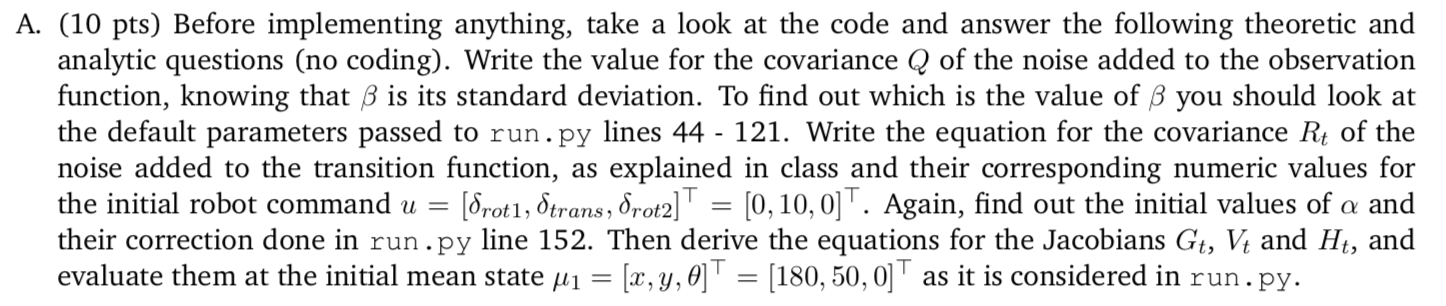

In [64]:
import numpy as np
from matplotlib import pyplot as plt

Observation: [bearing to landmark, landmark ID]; (radians, integer)

Observations are landmark detections sensed through noisy bearing measurements.

Observation noise, standard deviation 20 (format: deg)

So variance of beta is 20^2

Each landmark has a unique ID and so data association is known for this exercise, 
so std_corr^2 = 0 (eliminates)

In [15]:
Q = np.array([[20**2, 0], [0, 0]])
print("Covariance Q is:")
print(Q)

# Q = 20**2
# print("Q is", Q)

Covariance Q is:
[[400   0]
 [  0   0]]


### Their corresponding numeric values for the initial robot command are

In [102]:
alphas = np.array([0.05, 0.001, 0.05, 0.01]) **2 # rot1, trans, rot2
motion = np.array([0, 10, 0]) # δrot1, δtrans, δrot2

drot1, dtran, drot2 = motion
a1, a2, a3, a4 = alphas

R = np.diag([a1 * drot1 ** 2 + a2 * dtran ** 2,
            a3 * dtran ** 2 + a4 * (drot1 ** 2 + drot2 ** 2),
            a1 * drot2 ** 2 + a2 * dtran ** 2])
print("R is")
print(R)

R is
[[1.0e-04 0.0e+00 0.0e+00]
 [0.0e+00 2.5e-01 0.0e+00]
 [0.0e+00 0.0e+00 1.0e-04]]


In [105]:
mean_prior = np.array([180., 50., 0.])
_landmark_poses_x = np.array([21, 242, 463, 463, 242, 21])
_landmark_offset_y = np.array([0, 0, 0, 292, 292, 292])

#a = np.sqrt((242 - 180)**2 + (50)**2)
b = (242 - 180)**2 + (50)**2

a, b
H = np.array([50/b, -(242 - 180)/b, -1])

print("H is")
print(H)

H is
[ 0.00788146 -0.00977301 -1.        ]


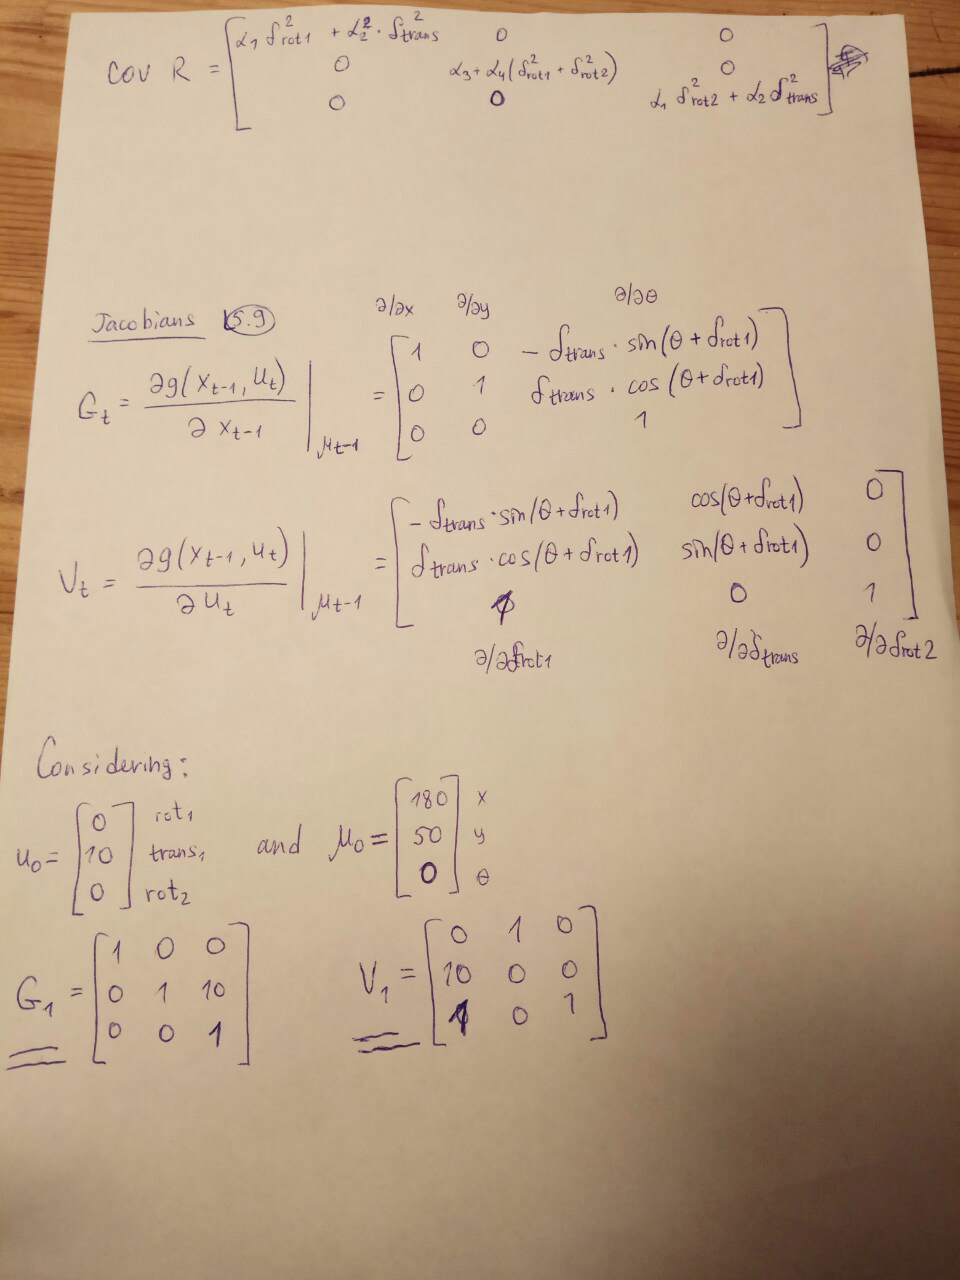

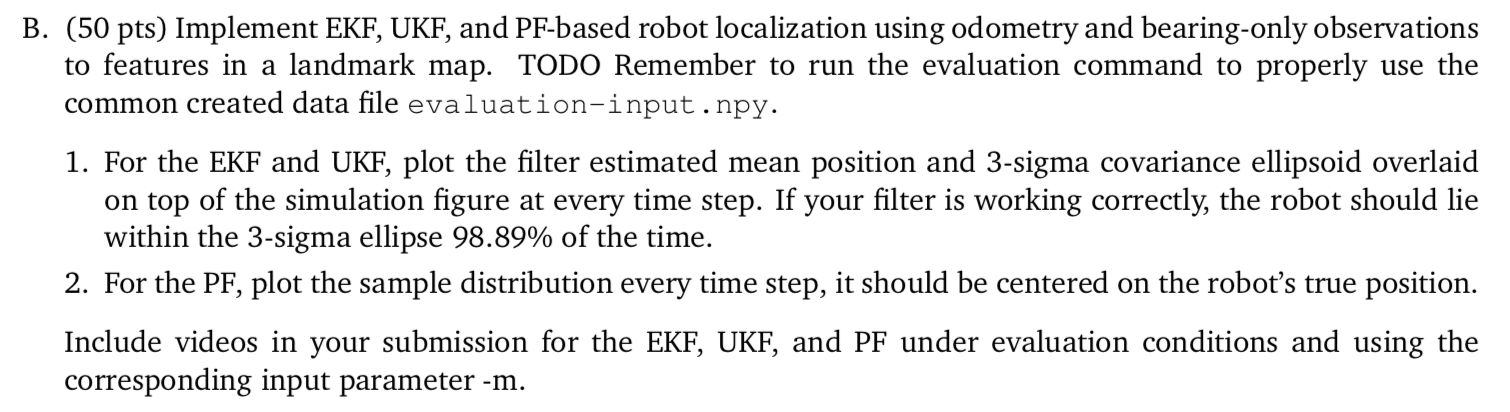

See attachment

Videos were recorded with external programm, because recommended CLI-command results in an error

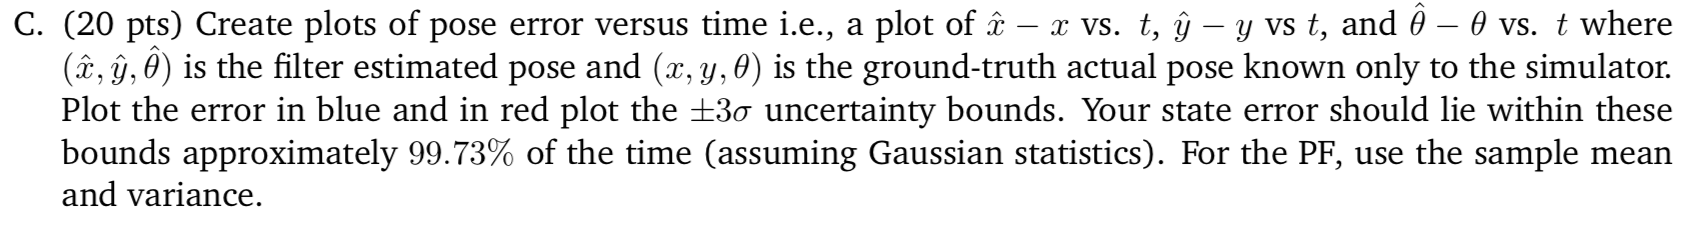

In [286]:
data_in = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/pf_out/input_data.npy')
data_out_pf = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/pf_out/output_data.npy')
data_out_ekf = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/ekf_out/output_data.npy')

In [291]:
def let_the_magic_begin(data_in, data_out):
    # plots pose errors and +- 3sigma uncertanty bounds vs time
    
    # data_in.files
    # ['num_steps', 'noise_free_motion', 'real_observations', 'noise_free_observations', 
    #  'real_robot_path', 'noise_free_robot_path']

    # data_out.files
    # ['mean_trajectory', 'covariance_trajectory']
    
    steps = data_in['num_steps']
    time = np.arange(steps)
    
    real_path_x = data_in["real_robot_path"][:, 0]
    real_path_y = data_in["real_robot_path"][:, 1]
    real_path_theta = data_in["real_robot_path"][:, 2]
    
    estimated_path_x = data_out['mean_trajectory'][:, 0]
    estimated_path_y = data_out['mean_trajectory'][:, 1]
    estimated_path_theta = data_out['mean_trajectory'][:, 2]

    error_x = real_path_x - estimated_path_x
    error_y = real_path_y - estimated_path_y
    error_theta = real_path_theta - estimated_path_theta
    
    # calculating 3-sigma
    cov = data_out['covariance_trajectory']
    s3x = 3*np.sqrt(cov[0, 0, :])
    s3y = 3*np.sqrt(cov[1, 1, :])
    s3th = 3*np.sqrt(cov[2, 2, :])
    
    # plotting
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
    f.set_size_inches(20,10)

    # plot pose_error_x
    ax1.plot(error_x, label='pose_error_x', color='blue')
    ax1.set_title('pose_error_x')
    ax1.fill_between(time, error_x + s3x, error_x - s3x, color='red', alpha=0.3)

    # plot pose_error_y
    ax2.plot(error_y, label='pose_error_y', color='blue')
    ax2.set_title('pose_error_y')
    ax2.fill_between(time, error_y + s3y, error_y - s3y, color='red', alpha=0.3)

    # plot pose_error_theta
    ax3.plot(error_theta, label='pose_error_y', color='blue')
    ax3.set_title('pose_error_theta')
    ax3.fill_between(time, error_theta + s3th, error_theta - s3th, color='red', alpha=0.3)

    ax.legend(loc='upper left')
    plt.show()

## Stock params

### PF (100 particles)

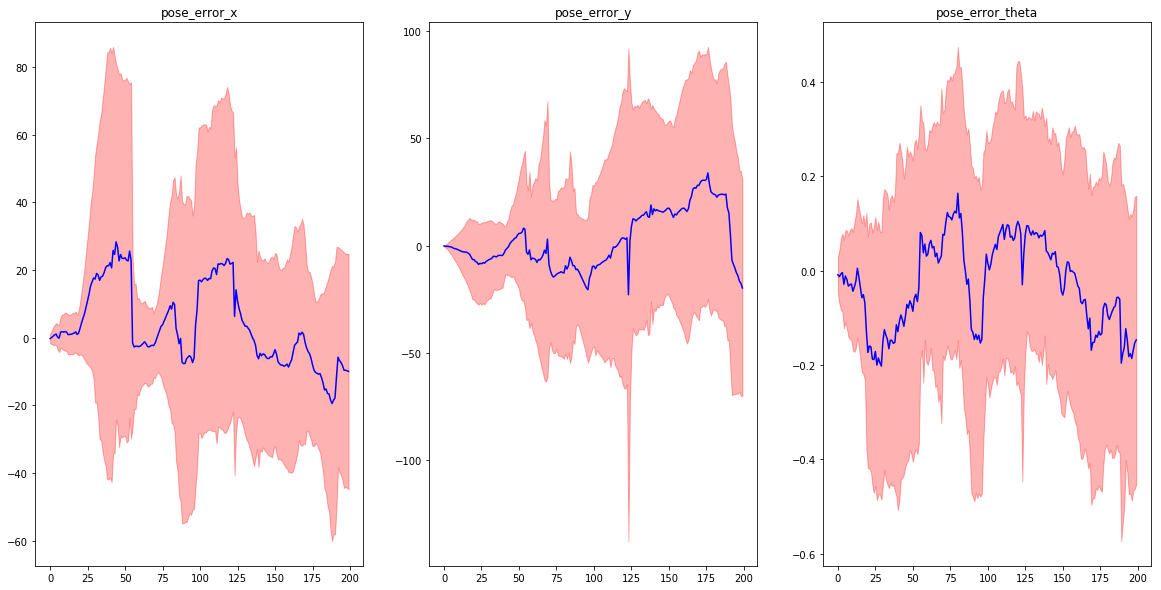

In [292]:
# plot pose error and +- 3sigma uncertanty bounds vs time
let_the_magic_begin(data_in, data_out_pf)

### EKF

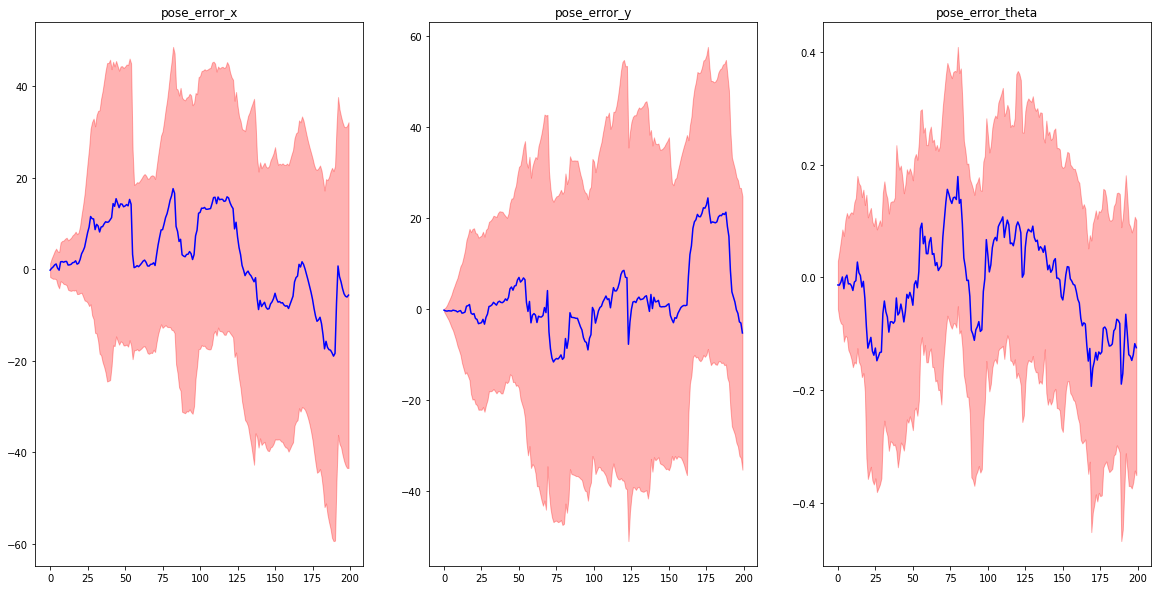

In [294]:
# plot pose error and +- 3sigma uncertanty bounds vs time
let_the_magic_begin(data_in, data_out_ekf)

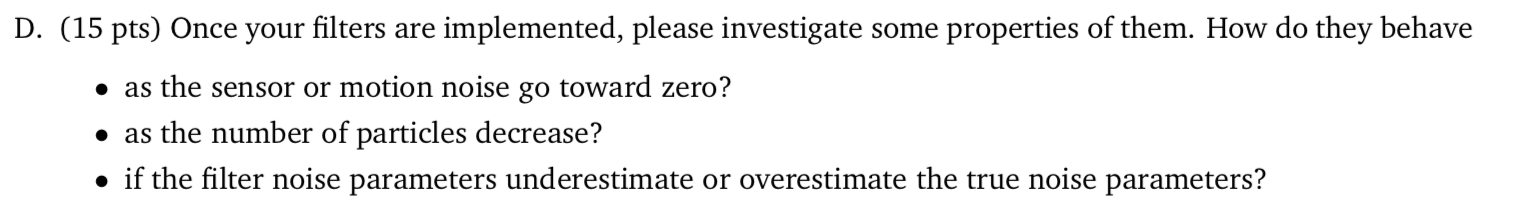

## Playing around with this parameters

### Sensor noise go toward zero (Q / 20)

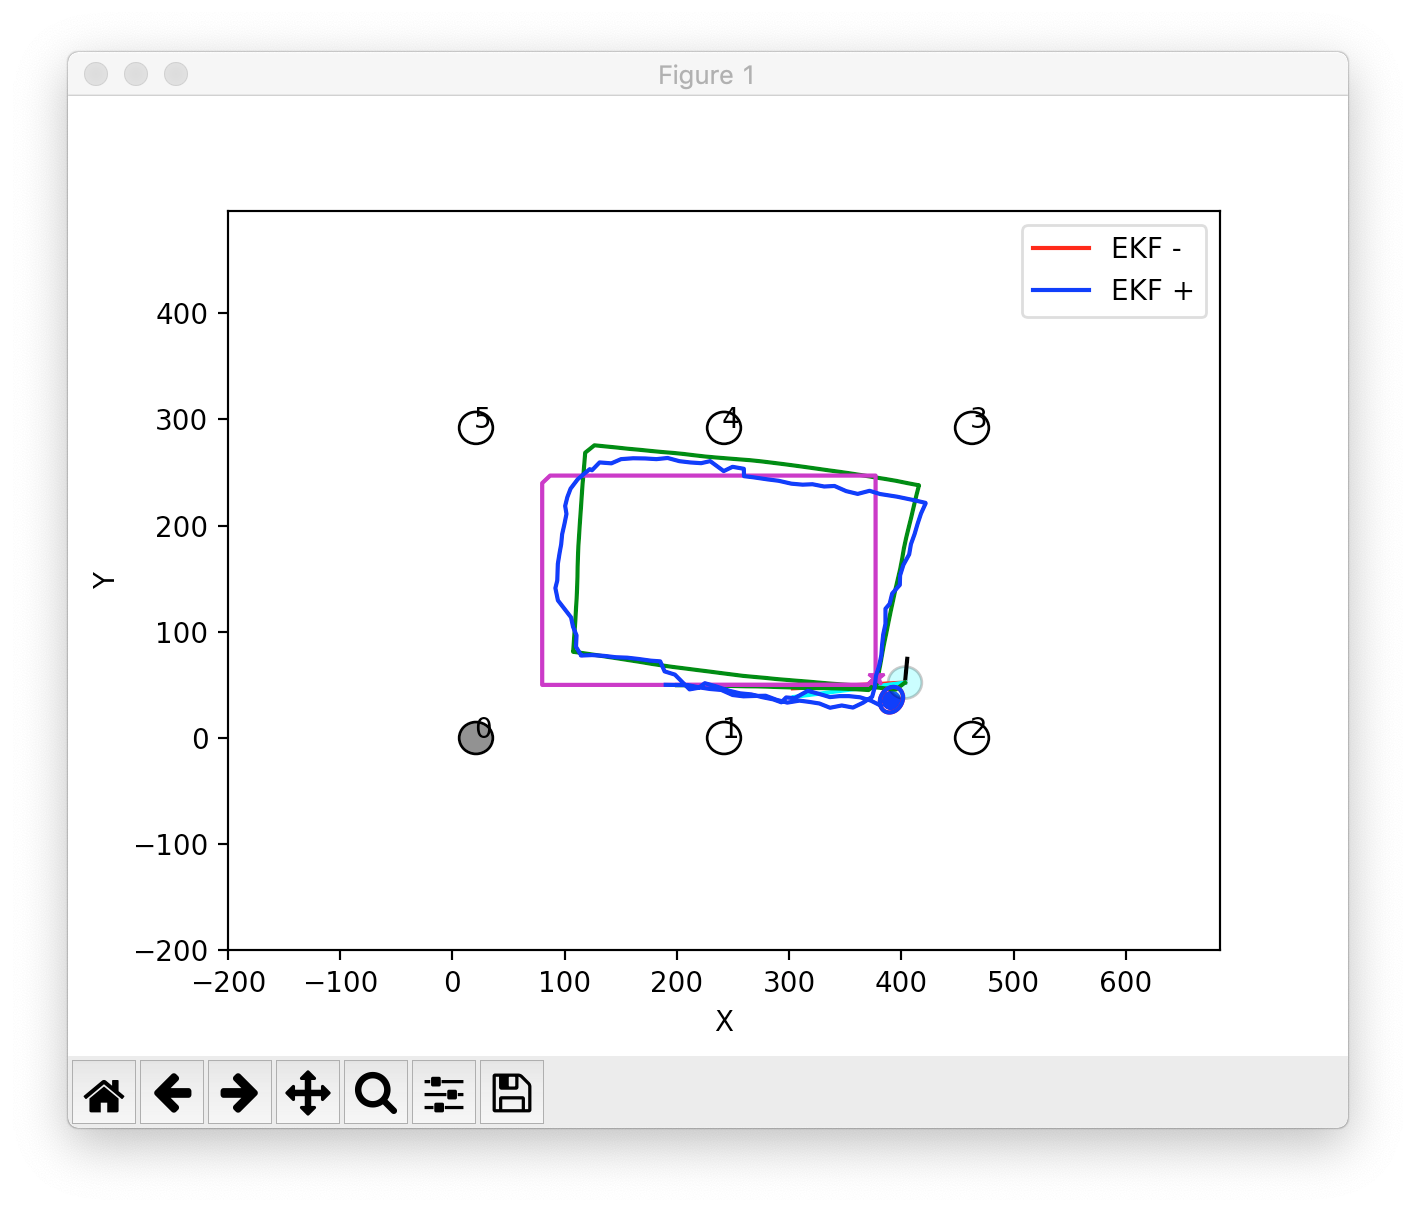

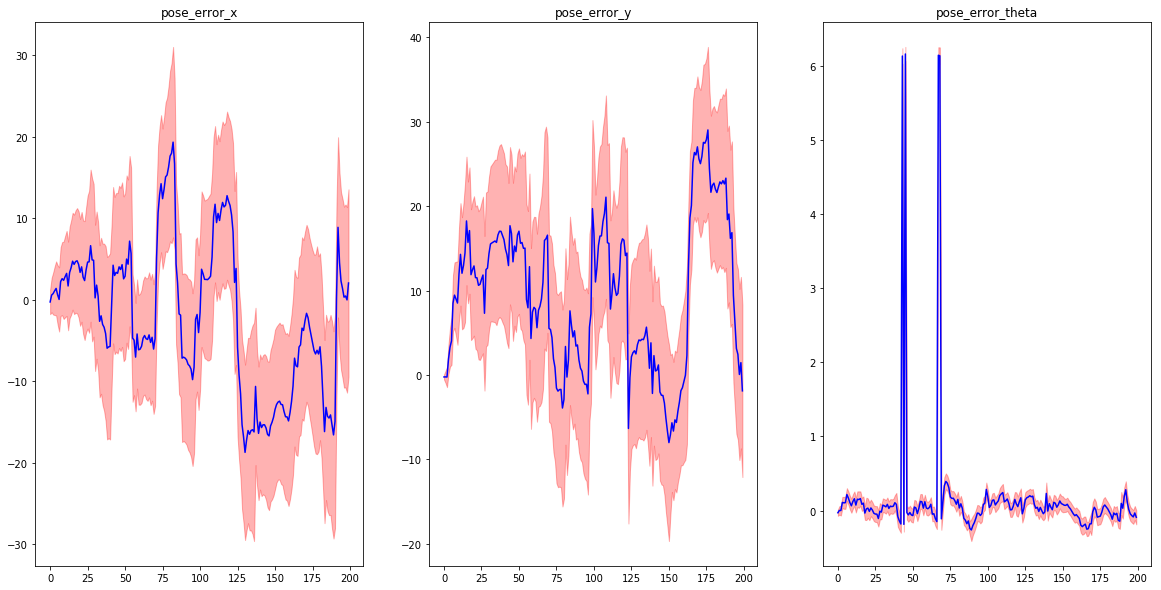

In [305]:
data_out_ekf_Qzero = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/ekf_out_Qzero/output_data.npy')
let_the_magic_begin(data_in, data_out_ekf_Qzero)

### Motion noise go toward zero (M / 100)

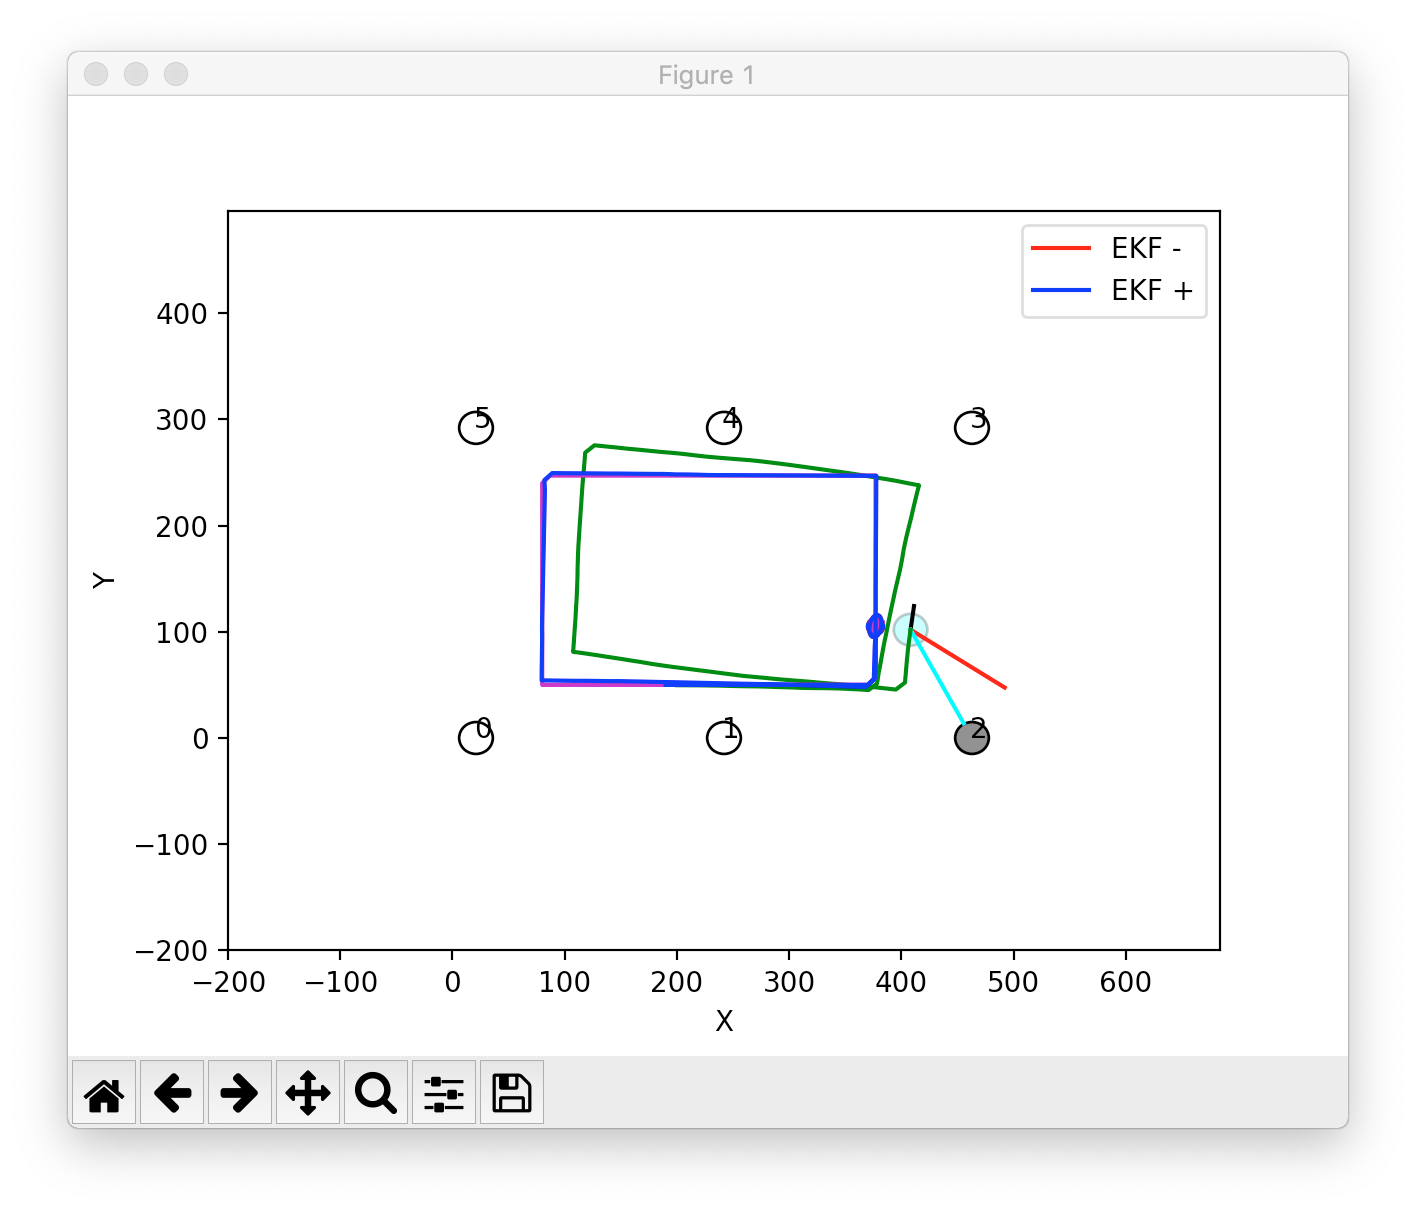

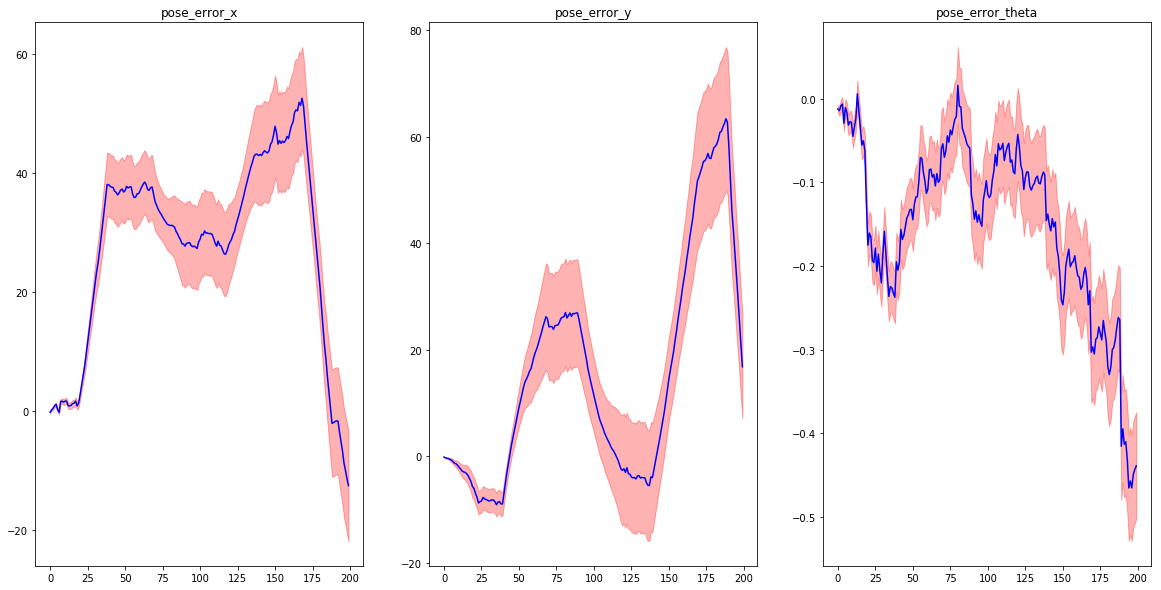

In [304]:
data_out_ekf_Mzero = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/ekf_out_Mzero/output_data.npy')
let_the_magic_begin(data_in, data_out_ekf_Mzero)

With low motion noise covariance robot cannot account noise that affected transition function and so it thinks that it's followng commanded odomentry sequence.

### The number of particles decrease (10 particles)

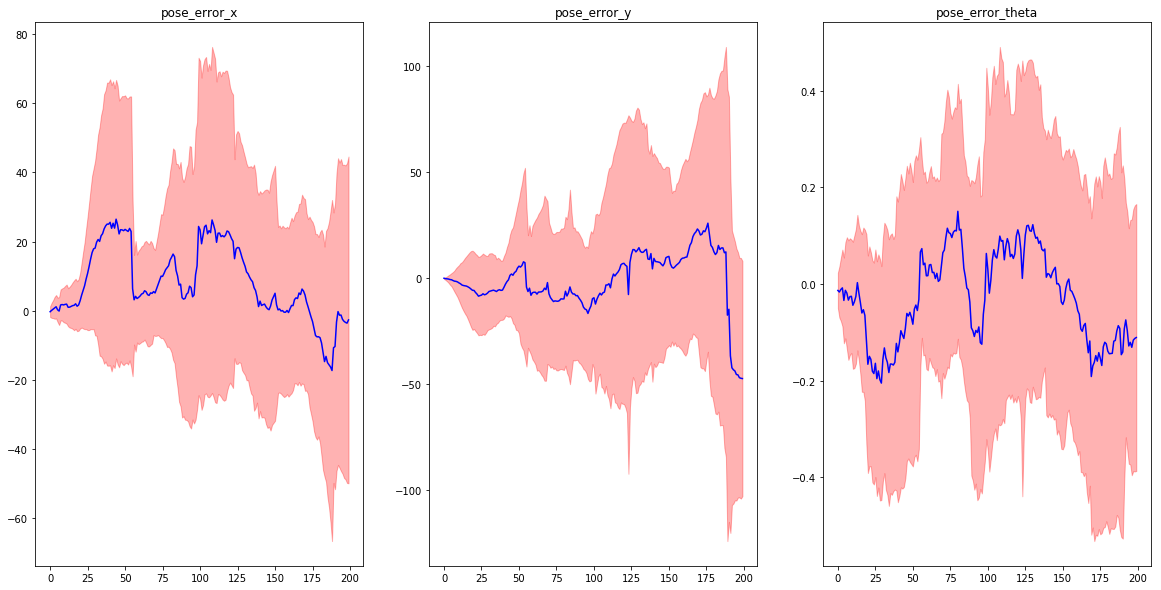

In [298]:
data_out_pf_low = np.load('/Users/nickzherdev/Desktop/!Perception/ps2/ps2_code/pf_out_low/output_data.npy')
let_the_magic_begin(data_in, data_out_pf_low)

In general, if filter noise parameters UNDER-estimate the true noise parameters it will result in a
smaller Kalman filter gain and thus less confidence to measurements. 

In general, if filter noise parameters OVER-estimate the true noise parameters we compensate the imperfections of the motion model more that enough and filtration becomes less accurate.